# Ivan Berlim Gonçalves

## Project Summary

First, we present the exploratory analysis of our data. In the second stage, we develop a linear regression model to predict diamond prices and assess its accuracy. In the third stage, we expand our predictive modeling to predict the Difference between the Price and the Retail. Next, the final offer is made using only **\$235646.05 of the total budget**. The **expected profit is \$71197.62**. This choice was made to not include offers that could induce loss to the business. Of course, I could have used all the budget, risking some higher profit.

The model chosen was the Ridge Regression with **accuracy of 97,76% on the `Price` prediction and **61.13% on the `Difference` prediction**. I chose backward elimination to tune the parameters, which ended up being useful only in the first model, adding 0,06% in model accuracy.

Along with the project, I answered the following questions, but I'll summarize them now:

1. Do you think that any of the vendors are over or undercharging for diamonds compared to the other vendors? Do you think they are selling the same kind of diamonds? How did you come to this conclusion?

Yes, definitely there are some under and overcharging for the diamonds. The boxplot on vendors vs price, and plotting the price distribution vs the retail distribution were hints of this situation, but the certainty came when I calculated the difference between the price and retail columns.

2. What is the relationship between Carat and Retail Price? Why do you think the relationship takes this form?

They are highly correlated with a 0,78 ratio according to the correlation matrix. This relation is due to the straight relation between Carat and Diamond Price, with is directly related to the Retail price.

## Business Problem

Diamonds are a very unique consumer product. It is considered the hardest gem, that is 58 times harder than anything else on Earth [2], few people use diamonds for this utility. While the perceived value of a diamond may be affected by the price paid [3], diamonds also have well-defined physical properties: weight, cut and color among them.

* The goal of our project is to explore the relationship between the physical and social properties of diamonds and diamond prices to understand the degree to which diamond prices are determined. Then we'll understand relation between the diamonds retails price and the variables to predict diamond prices and retail prices. Finally we'll make an offer to maximaze the profit when buying a diamond.

Price dispersion - the variation in price for the same product across different retail channels arises due to the information asymmetry and imperfect consumer information. When consumers are differentially informed, firms can charge consumers different prices [4].

The most well-known attributes pertaining to diamonds are the 4Cs introduced by the Gemological Institute of America (GIA) in the 1950s - Cut, Carat, Color and Clarity. The 4Cs describe the unique qualities of each diamond and greatly influence diamond prices. Three of the 4Cs have a long history: carat weight, color, and clarity were used in the first diamond grading system created in India over 2,000 years ago [5].

* The cut refers to a diamond’s proportions and determines how well it reflects light. The cut scale ranges from poor to excellent. The cut of a diamond has additional three attributes: brilliance, or the amount of light reflected from a diamond; fire, or the dispersion of light into the colors of the spectrum; and scintillation, the flashes of sparkle when a diamond is moved around [6].

* Carat is a standard unit of weight and corresponds to a diamond’s size. One carat equals 0.2 grams. The name carat comes from the carob seed. Back in the day, traders started using carob seeds because of their fairly uniform weight to counterweight their balance scales. Only one in 1,000 diamonds weighs more than one carat. [5].

* The color ranges from D for colorless to Z for a diamond with a hint of yellow or brown. Colorless diamonds have more sparkle and brilliance, thus diamonds graded D through F are considered superior and more expensive. Most color distinctions are subtle and almost unnoticeable to a human eye, but can greatly affect the price of a diamond. The clarity corresponds to the lack of inclusions or natural flaws that a diamond has. Highly praised diamonds are flawless, and contain no inclusions or blemishes. The GIA Clarity Scale contains 11 grades from Flawless to Included. The majority of diamonds fall into categories of very slightly included (VS) or slightly included (SI) [6].

* Another important attribute of a diamond is its shape. There are about ten popular shapes of the diamonds. A round shape is the most prevalent shape as it is considered to be the shape that reflects light exceptionally well. Other popular shapes, sometimes called fancy shapes, are princess, cushion, pear, radiant, marquis, asscher, oval, heart, and emerald.

In addition to 4Cs and the shape, there are many other attributes of diamonds such as polish, depth, table, symmetry, fluorescence and, of course, price that ranges from a few hundred to tens of millions of dollars. Prior research on the effects of diamond characteristics on price suggests that the diamond weight is the key factor affecting price [7] and that the degree of price dispersion increases with the diamond weight [8].

According to the International Gem Society, out of 4Cs, the cut is the most important attribute of a diamond, followed by color, clarity, and the least important carat [9].



## Exploratory Analysis

Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import statsmodels.api as sm

Reading the .csv files

In [2]:
offers_df=pd.read_csv('offers.csv')
print('Shape of offers_df:', offers_df.shape)

training_df = pd.read_csv('training.csv')
print('Shape of training_df:', training_df.shape)

Shape of offers_df: (2683, 17)
Shape of training_df: (8050, 20)


### Exploring `offers_df`

Name of the columns

In [3]:
offers_df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN


In [4]:
offers_df.columns

Index(['id', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth',
       'Fluroescence', 'Known_Conflict_Diamond', 'Measurements', 'Polish',
       'Regions', 'Shape', 'Symmetry', 'Table', 'Vendor', 'Offers'],
      dtype='object')

Checking if there are any null values in the data

In [5]:
offers_df.isnull().sum()

id                           0
Carats                       0
Cert                       213
Clarity                      0
Color                        0
Cut                          0
Depth                      497
Fluroescence               409
Known_Conflict_Diamond    2378
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                      856
Vendor                       0
Offers                    2683
dtype: int64

A lot of null values, especially at the Known_Conflict_Diamond column. Cannot drop those rows.

Checking if there are any duplicated values

In [6]:

offers_df=offers_df.drop_duplicates()
print('Shape After deleting duplicate values:', offers_df.shape)

Shape After deleting duplicate values: (2683, 17)


Let's see some more information and basic statistic values

In [7]:
offers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 0 to 2682
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2683 non-null   int64  
 1   Carats                  2683 non-null   float64
 2   Cert                    2470 non-null   object 
 3   Clarity                 2683 non-null   object 
 4   Color                   2683 non-null   object 
 5   Cut                     2683 non-null   object 
 6   Depth                   2186 non-null   float64
 7   Fluroescence            2274 non-null   object 
 8   Known_Conflict_Diamond  305 non-null    object 
 9   Measurements            2683 non-null   object 
 10  Polish                  2683 non-null   object 
 11  Regions                 2683 non-null   object 
 12  Shape                   2683 non-null   object 
 13  Symmetry                2683 non-null   object 
 14  Table                   1827 non-null   

In [8]:
offers_df.describe()

,id,Carats,Depth,Table,Vendor,Offers
count,2683.00000,2683.000000,2186.000000,1827.000000,2683.000000,0.0
mean,9392.00000,1.264845,61.781656,58.104324,2.045099,NaN
std,774.65971,0.893580,1.389693,2.081220,0.984886,NaN
min,8051.00000,0.400000,56.000000,43.000000,1.000000,NaN
25%,8721.50000,0.700000,60.925000,57.000000,1.000000,NaN
50%,9392.00000,1.050000,62.000000,58.000000,2.000000,NaN
75%,10062.50000,1.505000,62.600000,59.000000,3.000000,NaN
max,10733.00000,10.050000,67.300000,70.000000,4.000000,NaN


Some of the variables are wrongly classified. Vendors should be categorical, Price and Retail should be numeric

In [9]:
offers_df.nunique()

id                        2683
Carats                     280
Cert                         2
Clarity                     10
Color                       15
Cut                          6
Depth                       95
Fluroescence                11
Known_Conflict_Diamond       2
Measurements              2634
Polish                       5
Regions                      9
Shape                       14
Symmetry                     6
Table                       19
Vendor                       4
Offers                       0
dtype: int64

### Exploring `training_df`

I'll to the same exploration to this dataset

In [10]:
training_df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.41,NaN,SI1,L,,65.4,None,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,$ 430,$ 850,6.063785,6.745236
1,2,0.42,AGSL,SI2,L,,61.7,Strong Bl..,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,$ 560,$ 920,6.327937,6.824374
2,3,0.40,AGSL,SI1,L,,64.0,None,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,$ 560,$ 575,6.327937,6.354370
3,4,0.41,AGSL,SI2,L,,62.7,Strong Bl..,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,$ 560,$ 825,6.327937,6.715383
4,5,0.40,AGSL,SI1,L,,63.0,NaN,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,$ 580,$ 890,6.363028,6.791221


In [11]:
training_df.columns

Index(['id', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth',
       'Fluroescence', 'Known_Conflict_Diamond', 'Measurements', 'Polish',
       'Regions', 'Shape', 'Symmetry', 'Table', 'Vendor', 'Price', 'Retail',
       'LogPrice', 'LogRetail'],
      dtype='object')

In [12]:
training_df.isnull().sum()

id                           0
Carats                       0
Cert                       552
Clarity                      0
Color                        0
Cut                          0
Depth                     1440
Fluroescence              1150
Known_Conflict_Diamond       0
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                     2531
Vendor                       0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
dtype: int64

In [13]:
# Removing duplicate rows if any
training_df=training_df.drop_duplicates()
print('Shape After deleting duplicate values:', training_df.shape)

Shape After deleting duplicate values: (8050, 20)


In [14]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8050 entries, 0 to 8049
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    7498 non-null   object 
 3   Clarity                 8050 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   6610 non-null   float64
 7   Fluroescence            6900 non-null   object 
 8   Known_Conflict_Diamond  8050 non-null   bool   
 9   Measurements            8050 non-null   object 
 10  Polish                  8050 non-null   object 
 11  Regions                 8050 non-null   object 
 12  Shape                   8050 non-null   object 
 13  Symmetry                8050 non-null   object 
 14  Table                   5519 non-null   

In [15]:
training_df.describe()

,id,Carats,Depth,Table,Vendor,LogPrice,LogRetail
count,8050.000000,8050.000000,6610.000000,5519.000000,8050.000000,8050.000000,8050.000000
mean,4025.500000,1.265807,61.723374,57.951984,2.050435,8.803274,9.127529
std,2323.979167,0.894574,2.192793,3.051339,0.983876,1.225854,1.282771
min,1.000000,0.400000,0.000000,0.000000,1.000000,5.978886,3.806662
25%,2013.250000,0.700000,61.000000,57.000000,1.000000,7.897296,8.180671
50%,4025.500000,1.040000,62.000000,58.000000,2.000000,8.860783,9.243291
75%,6037.750000,1.510000,62.600000,59.000000,3.000000,9.592878,9.929155
max,8050.000000,11.920000,69.700000,69.000000,4.000000,13.899654,14.331437


In [16]:
training_df.nunique()

id                        8050
Carats                     393
Cert                         2
Clarity                     13
Color                       32
Cut                          6
Depth                      115
Fluroescence                13
Known_Conflict_Diamond       2
Measurements              7509
Polish                       4
Regions                      9
Shape                       14
Symmetry                     7
Table                       22
Vendor                       4
Price                     3952
Retail                    4618
LogPrice                  3952
LogRetail                 4618
dtype: int64

## Data Cleaning and Preprocessing

### Numerical Data

Extracting `Measure` informations

In [17]:
measures = []
length = []
width = []
depth = []

for values in training_df['Measurements']:
    measures.append(re.split('([\d.]+)\D([\d.]+)\D([\d.]+)', values))

for values in measures:
    del values[0]
    del values[-1]
    length.append(values[0])
    width.append(values[1])
    depth.append(values[2])

training_df['length'] = length
training_df['width'] = width
training_df['depth'] = depth

training_df['length'] = training_df['length'].astype(float)
training_df['width'] = training_df['width'].astype(float)
training_df['depth'] = training_df['depth'].astype(float)

Checking if there are any inconsistency in measures

In [18]:
training_df.rename(columns={'Depth':'Depth_perc'}, inplace=True)

print("Number of rows with x == 0: {} ".format((training_df.length==0).sum()))
print("Number of rows with y == 0: {} ".format((training_df.width==0).sum()))
print("Number of rows with z == 0: {} ".format((training_df.depth==0).sum()))
print("Number of rows with Depth (%) == 0: {} ".format((training_df.Depth_perc ==0).sum()))

Number of rows with x == 0: 0 
Number of rows with y == 0: 0 
Number of rows with z == 0: 0 
Number of rows with Depth (%) == 0: 5 


A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only

In [19]:
training_df[['Depth_perc']] = training_df[['Depth_perc']].replace(0,np.NaN)

In [20]:
print(training_df.shape)
training_df.isnull().sum()

(8050, 23)


id                           0
Carats                       0
Cert                       552
Clarity                      0
Color                        0
Cut                          0
Depth_perc                1445
Fluroescence              1150
Known_Conflict_Diamond       0
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                     2531
Vendor                       0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
length                       0
width                        0
depth                        0
dtype: int64

Lets plot a correlation matrix to understand the variables relations

In [21]:
training_df = training_df.drop('id', axis = 1)

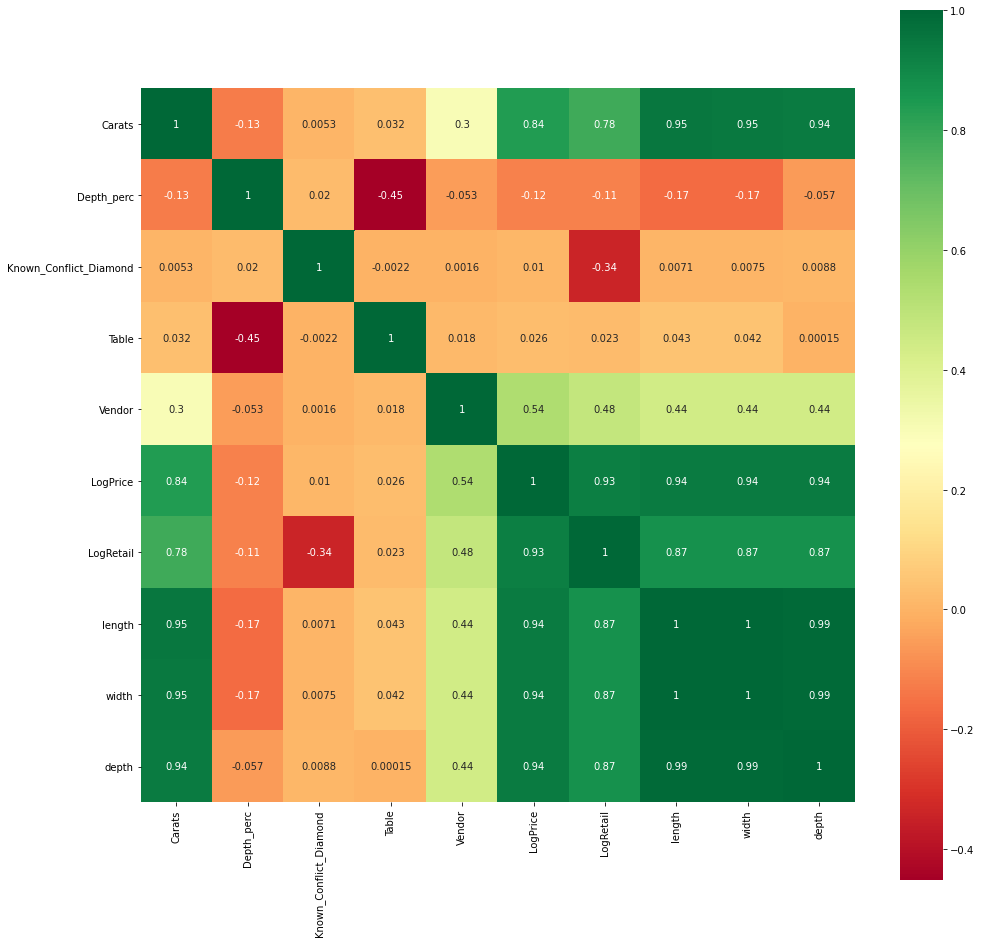

In [22]:
plt.figure(figsize=(16,16))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(training_df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

Since `Table` and `Depth_perc` have significant Null values and have no substantial correlation with other variables, except with each other, we'll drop these variables. As for `Known_Conflict_Diamond`, our train data has a lot of Null values for them, so we'll drop them now to prevent problems with modeling the train data. We'll do the same to `Fluorescence` and `Cert` since they carry null values and may not be so important when modeling. Also, we'll drop the `Measurements` variable, since we already extracted its values.

In [23]:
training_df.drop(['Table', 'Depth_perc', 'Known_Conflict_Diamond', 'Cert', 'Fluroescence', 'Measurements'], axis=1, inplace=True)

Plotting a Pairplot of the variables

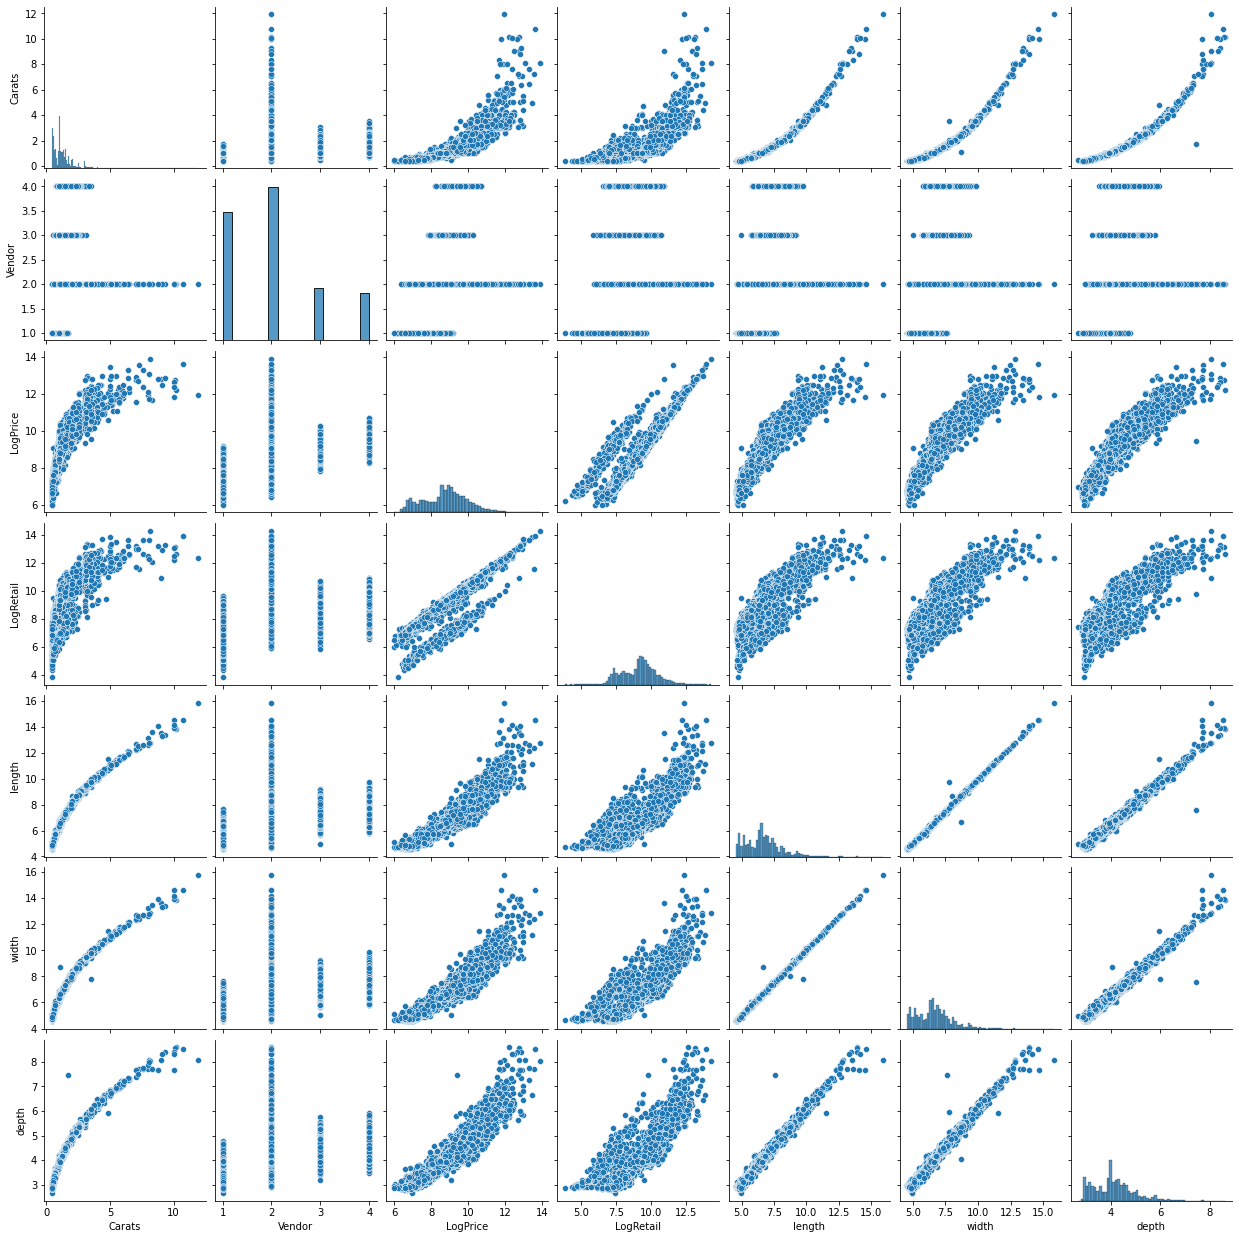

In [24]:
p=sns.pairplot(training_df)

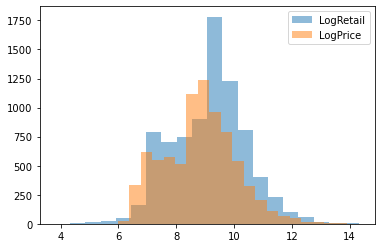

In [25]:
plt.hist(training_df['LogRetail'], bins = 20, alpha=0.5, label='LogRetail')
plt.hist(training_df['LogPrice'], bins = 20, alpha=0.5, label='LogPrice')
plt.legend(loc='upper right')
plt.show()

We have signs of under and over charging in retail's prices

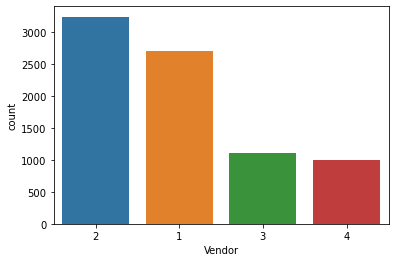

In [26]:
p = sns.countplot(x = 'Vendor', data = training_df, order = training_df.Vendor.value_counts().index)

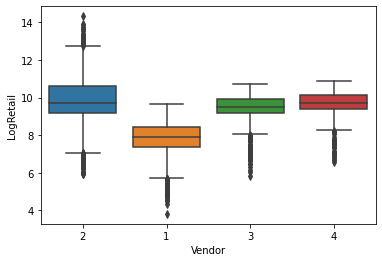

In [27]:
p = sns.boxplot(x='Vendor', y='LogRetail', data=training_df, order = training_df.Vendor.value_counts().index)

Vendor 1 seems to be under charging

#### Categorical Data

In [28]:
training_cat = training_df.select_dtypes(include=['object'])
for col in training_cat.columns:
    print(training_cat[col].value_counts()) # to print count of every category

SI2     2208
SI1     2168
VS2     1569
VS1     1130
VVS2     448
VVS1     239
IF       137
I1       132
I2        13
FL         2
N          2
None       1
I3         1
Name: Clarity, dtype: int64
G            1188
I            1158
H            1092
E            1042
F            1000
J             843
D             816
K             540
L             259
M              85
Ffcdbrown       2
Fdy             2
N               2
Fvyellow        2
Ffg             2
U               1
W               1
Gy              1
Fiyellow        1
P               1
Ffcly           1
Flyellow        1
S               1
Fdpink          1
Lb              1
Ffcg            1
Fly             1
Ffcy            1
Fiy             1
Fyellow         1
O-p             1
Q-r             1
Name: Color, dtype: int64
             3922
Excellent    2811
Very good    1123
Good          178
Fair           15
Ideal           1
Name: Cut, dtype: int64
Excellent    5383
Very good    1589
              899
Good          1

It seems like a lot of values are missing in `Cut`, `Polish` and `Symmetry`. Now we have a problem because `Cut` is one of the 4C's variables that really influence the final price. I'll drop them and see how the model performs. I'll drop `Price` and `Retail` too, as we already have its log values on the numerical variables. I'll drop `Vendor` too because it doesn't influence our Price.

In [29]:
training_df.drop(['Cut', 'Polish', 'Symmetry', 'Price', 'Retail', 'Vendor'], axis=1, inplace=True)

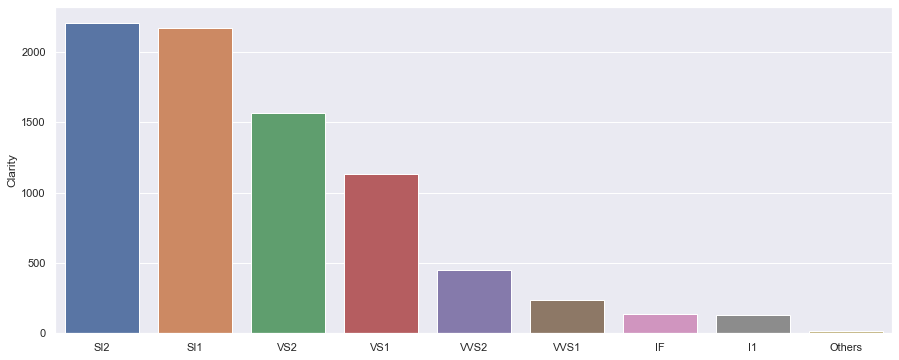

In [30]:
clarity_others =training_df['Clarity'].value_counts()
clarity_others=clarity_others.groupby(np.where(clarity_others>=100,clarity_others.index,'Others')).sum().sort_values(ascending = False)
sns.set(rc={'figure.figsize':(15,6)})
p = sns.barplot(x = clarity_others.index, y = clarity_others)

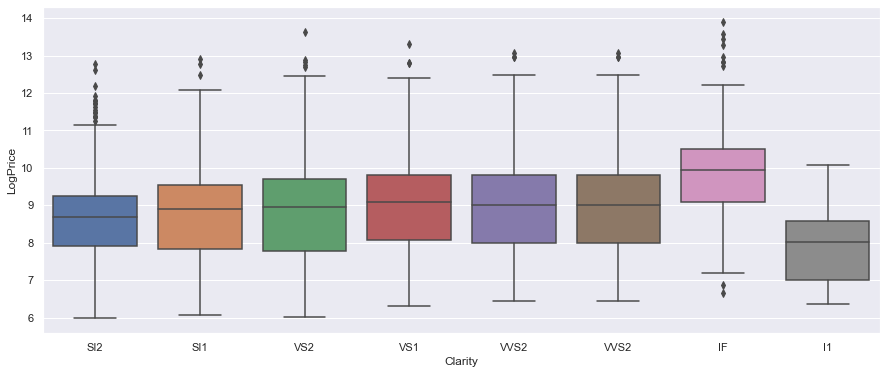

In [31]:
p = sns.boxplot(x='Clarity', y='LogPrice', data=training_df, order = ['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS2', 'IF', 'I1'])

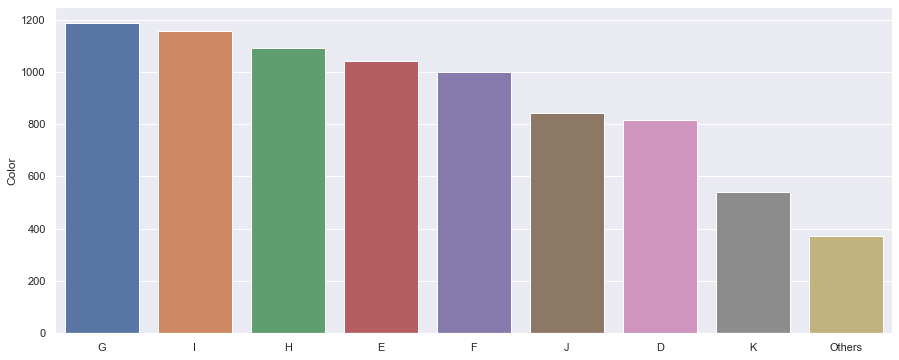

In [32]:
color_others =training_df['Color'].value_counts()
color_others=color_others.groupby(np.where(color_others>=500,color_others.index,'Others')).sum().sort_values(ascending = False)
sns.set(rc={'figure.figsize':(15,6)})
p = sns.barplot(x = color_others.index, y = color_others)

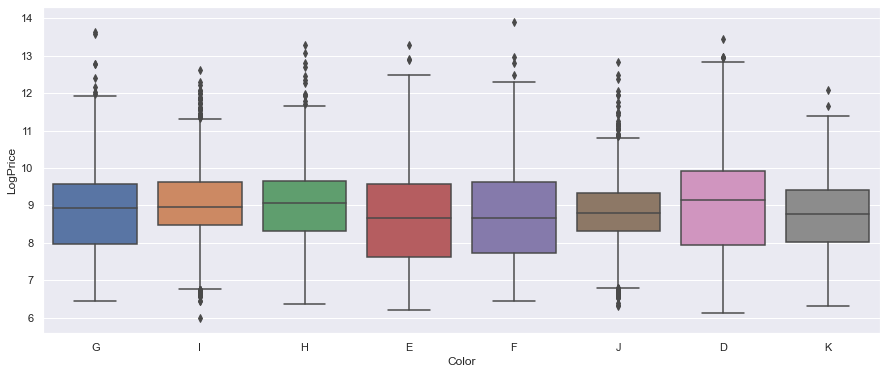

In [33]:
p = sns.boxplot(x='Color', y='LogPrice', data=training_df, order = ['G', 'I', 'H', 'E', 'F', 'J', 'D', 'K'])

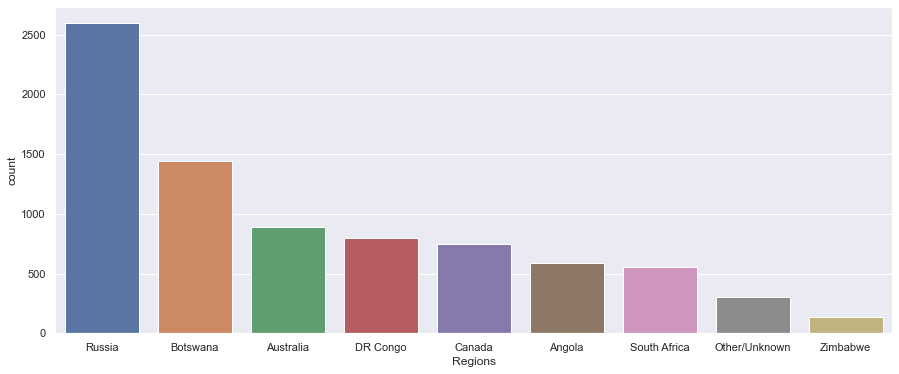

In [34]:
p = sns.countplot(x = 'Regions', data = training_df, order = training_df.Regions.value_counts().index)

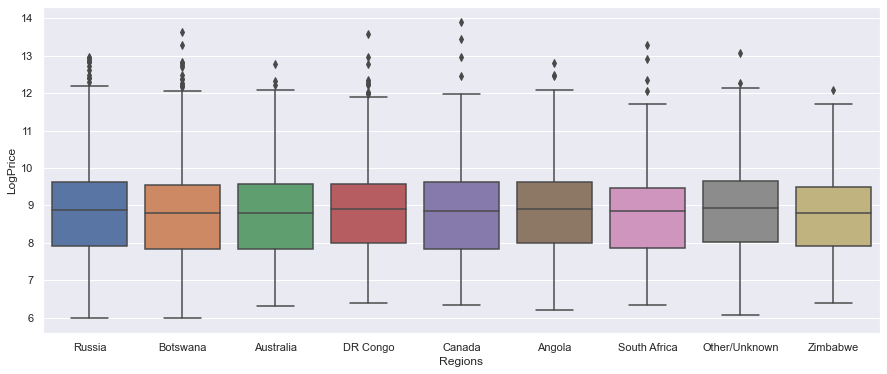

In [35]:
p = sns.boxplot(x='Regions', y='LogPrice', data=training_df, order = training_df.Regions.value_counts().index)

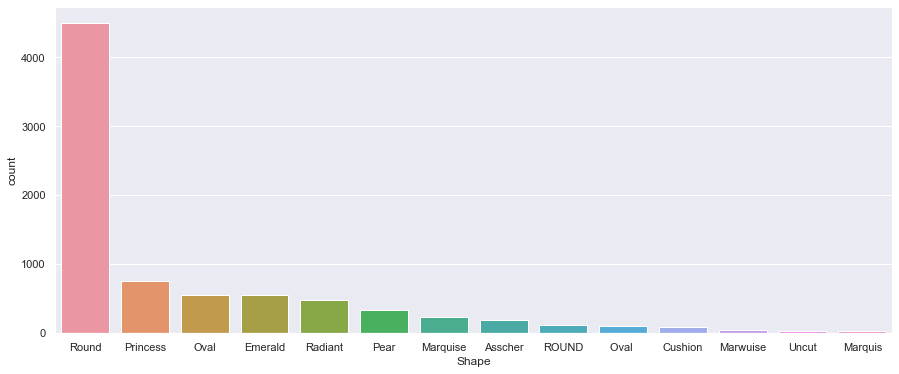

In [36]:
p = sns.countplot(x = 'Shape', data = training_df, order = training_df.Shape.value_counts().index)

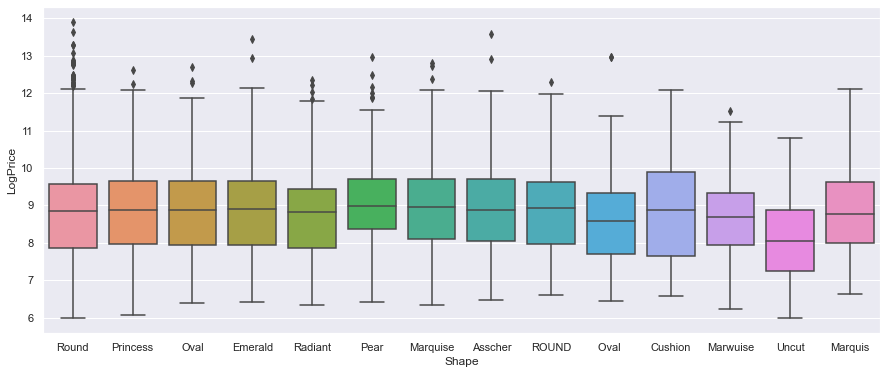

In [37]:
p = sns.boxplot(x='Shape', y='LogPrice', data=training_df, order = training_df.Shape.value_counts().index)

Mostly the median prices are very low as compared to the highest price values for all the categories in colors, cut, and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

In [38]:
training_cat = training_df.select_dtypes(include=['object'])
training_num = training_df.select_dtypes(include=np.number)

### One-Hot-Encoding

In [39]:
one_hot_encoders_training_df =  pd.get_dummies(training_df)
cols = one_hot_encoders_training_df.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_training_df,columns= cols)

### Data Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['Carats', 'length', 'width', 'depth']]),
                           columns=['Carats', 'length', 'width', 'depth'],index=diamond_clean_data.index)

In [41]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['Carats', 'length', 'width', 'depth']] = numericals[['Carats', 'length', 'width', 'depth']]
diamond_clean_data_standard.head()

,Carats,LogPrice,LogRetail,length,width,depth,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,...,Shape_Marquise,Shape_Marwuise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut
0,-0.956724,6.063785,6.745236,-1.479575,-1.497445,-1.305272,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.945545,6.327937,6.824374,-1.331469,-1.372832,-1.365727,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.967903,6.327937,6.354370,-1.472170,-1.490115,-1.377818,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.956724,6.327937,6.715383,-1.435143,-1.446134,-1.402000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.967903,6.363028,6.791221,-1.435143,-1.453464,-1.389909,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train - Test Split (70-30)

In [42]:
x = diamond_clean_data_standard.drop(["LogPrice"],axis=1)
y = diamond_clean_data_standard.LogPrice

In [43]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

## Training/Evaluating the Model

### Linear Regression

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: -1.1253601195201415e+21%
Mean absolute error: 281254313.5120508
Mean squared error: 1.7136222882326559e+19
R Squared: -1.1253601195201415e+19
Adjusted R Squared: -1.1599570147402312e+19


### Lasso Regression Implementation

In [45]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 45.32724256172619%
Mean absolute error: 0.723627664300787
Mean squared error: 0.8325197781605492
R Squared: 0.4532724256172619
Adjusted R Squared: 0.4364644045431555


### Ridge Regression Implementation

In [46]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 97.70392729113951%
Mean absolute error: 0.13294316904286432
Mean squared error: 0.034963042505751815
R Squared: 0.9770392729113951
Adjusted R Squared: 0.9763333923177233


## Tuning Parameters

### Backward elimination
Involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.

* How to perform backward elimination?

1. Run Linear Regression using all independent variables.

2. Check out the p-values for all the independent variables.

3. If you choose the confidence level to be 95% then remove the independent variable having a maximum p-value and greater than 0.05.

4. Rerun Linear Regression on the new data.

5. Repeat steps 2 to 4 till no p-value is greater than 0.05

Why Stats Model Library?

StatsModel offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R. When you need a variety of linear regression models, mixed linear models, regression with discrete dependent variables, and more – StatsModels has options. Since we need p-values for backward elimination which is provided in this great report format by the StatsModel library it has been used to apply the backward elimination technique.

I've already done these steps, and to spare the code size, I'll drop them all at once

In [47]:
l = list(range(0,len(diamond_clean_data_standard.columns)))

X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['LogPrice'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = sm.OLS(endog = diamond_clean_data_standard.LogPrice, exog = X_opt).fit()
regressor_ols.summary()

l.pop(34)
l.pop(23)
l.pop(11)
l.pop(7)
l.pop(27)
l.pop(10)
l.pop(26)
l.pop(40)
l.pop(23)
l.pop(37)
l.pop(3)
l.pop(61)
l.pop(18)
l.pop(22)
l.pop(24)
l.pop(19)
l.pop(7)

9

Selecting new columns to predict a new model

In [48]:
diamond_copy = diamond_clean_data_standard.copy()

colname = []
for i in l:
    colname.append(diamond_copy.columns[i])
    
diamond_final = diamond_copy[colname].copy()
diamond_final.shape

(8050, 57)

In [49]:
x_2 = diamond_final.drop(["LogPrice"],axis=1)
y_2 = diamond_final.LogPrice

train_x2, test_x2, train_y2, test_y2 = train_test_split(x_2, y_2,random_state = 2,test_size=0.3)

In [50]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x2,train_y2)
y2_pred = rig_reg.predict(test_x2)
print("accuracy: "+ str(rig_reg.score(test_x2,test_y2)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y2,y2_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y2,y2_pred)))
R2 = r2_score(test_y2,y2_pred)
print('R Squared: {}'.format(R2))
n=test_x2.shape[0]
p=test_x2.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 97.76049260526067%
Mean absolute error: 0.13244344142253733
Mean squared error: 0.034101704154254064
R Squared: 0.9776049260526066
Adjusted R Squared: 0.9770827857104674


0,06% improvement in accuracy, R Squared and Adjusted R Squared.

## Predict new `Price` values to `offers_df` data

I'll prepare the `offers_df` dataset to model

In [51]:
measures = []
length = []
width = []
depth = []

for values in offers_df['Measurements']:
    measures.append(re.split('([\d.]+)\D([\d.]+)\D([\d.]+)', values))

for values in measures:
    del values[0]
    del values[-1]
    length.append(values[0])
    width.append(values[1])
    depth.append(values[2])

offers_df['length'] = length
offers_df['width'] = width
offers_df['depth'] = depth

offers_df['length'] = training_df['length'].astype(float)
offers_df['width'] = training_df['width'].astype(float)
offers_df['depth'] = training_df['depth'].astype(float)

In [52]:
offers_df.drop(['id', 'Table', 'Depth', 'Known_Conflict_Diamond', 'Cert', 'Fluroescence',
                'Measurements', 'Cut', 'Polish', 'Symmetry', 'Vendor'], axis=1, inplace=True)

In [53]:
offers_cat = offers_df.select_dtypes(include=['object'])
offers_num = offers_df.select_dtypes(include=np.number)


In [54]:
one_hot_encoders_offers_df =  pd.get_dummies(offers_df)
cols = one_hot_encoders_offers_df.columns
diamond_clean_data2 = pd.DataFrame(one_hot_encoders_offers_df,columns= cols)

In [55]:
sc_X = StandardScaler()
numericals2 =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data2[['Carats', 'length', 'width', 'depth']]),
                           columns=['Carats', 'length', 'width', 'depth'],index=diamond_clean_data2.index)

In [56]:
diamond_clean_data_standard2 = diamond_clean_data2.copy(deep=True)
diamond_clean_data_standard2[['Carats', 'length', 'width', 'depth']] = numericals2[['Carats', 'length', 'width', 'depth']]
diamond_clean_data_standard2.head()

,Carats,Offers,length,width,depth,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_SI1,...,Shape_Marquise,Shape_Marwuise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut
0,-0.945638,NaN,-1.298792,-1.311677,-0.975456,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.968024,NaN,-1.033386,-1.088986,-1.082322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.956831,NaN,-1.285522,-1.298578,-1.103696,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.968024,NaN,-1.219170,-1.219981,-1.146442,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.968024,NaN,-1.219170,-1.233080,-1.125069,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
del_lst = list(set(colname) - set(diamond_clean_data_standard2.columns))
del_lst.remove('LogPrice')

In [58]:
diamond_copy2 = diamond_clean_data_standard2.copy()
diamond_final2 = diamond_copy2[diamond_copy2.columns.intersection(colname)]
diamond_final2.shape

(2683, 43)

### Preparing model to predict new Price data

I'll prepare the `training_df` dataset to train a model that will receave `offers_df` data

In [59]:
diamond_final.drop(del_lst, axis = 1, inplace = True)

In [60]:
diamond_final.shape

(8050, 44)

In [61]:
x_3 = diamond_final.drop(["LogPrice"],axis=1)
y_3 = diamond_final.LogPrice

train_x3, test_x3, train_y3, test_y3 = train_test_split(x_3, y_3,random_state = 2,test_size=0.3)

In [62]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x3,train_y3)
y3_pred = rig_reg.predict(test_x3)
print("accuracy: "+ str(rig_reg.score(test_x3,test_y3)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y3,y3_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y3,y3_pred)))
R2 = r2_score(test_y3,y3_pred)
print('R Squared: {}'.format(R2))
n=test_x2.shape[0]
p=test_x2.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 97.29509451617005%
Mean absolute error: 0.14284778275967833
Mean squared error: 0.0411884715323855
R Squared: 0.9729509451617006
Adjusted R Squared: 0.972320297422783


## Predicting `offers_df` Price Values

Predicting its values and creating a new columns

In [63]:
y4_pred = rig_reg.predict(diamond_final2)

predicted_offers_df=pd.read_csv('offers.csv')
predicted_offers_df['Price'] = np.exp(y4_pred)
predicted_offers_df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Price
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN,650.076271
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN,981.658969
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN,624.543823
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN,863.506354
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,867.646728


### Finding the best possible offers.

Difference between Retail and Price must be as negative as possible.

In [64]:
training_df2 = pd.read_csv('training.csv')
training_df2['Price'] = np.exp(training_df2.LogPrice)
training_df2['Retail'] = np.exp(training_df2.LogRetail)

Setting a new collumn named `Diff` that represents the difference between `Retail` and `Price`

In [65]:
training_df2['Diff'] = training_df2['Retail'] - training_df2['Price']
training_df2.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,...,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Diff
0,1,0.41,NaN,SI1,L,,65.4,None,False,4.65x4.62x3.03,...,Other/Unknown,Princess,Good,NaN,1,430.0,850.0,6.063785,6.745236,420.0
1,2,0.42,AGSL,SI2,L,,61.7,Strong Bl..,False,4.85x4.79x2.98,...,Russia,Marquise,Very good,NaN,1,560.0,920.0,6.327937,6.824374,360.0
2,3,0.40,AGSL,SI1,L,,64.0,None,False,4.66x4.63x2.97,...,South Africa,Round,Excellent,57.0,1,560.0,575.0,6.327937,6.354370,15.0
3,4,0.41,AGSL,SI2,L,,62.7,Strong Bl..,False,4.71x4.69x2.95,...,Botswana,Round,Very good,58.0,1,560.0,825.0,6.327937,6.715383,265.0
4,5,0.40,AGSL,SI1,L,,63.0,NaN,False,4.71x4.68x2.96,...,Botswana,Round,Very good,58.0,1,580.0,890.0,6.363028,6.791221,310.0


In [66]:
training_df2.nsmallest(10, 'Diff')

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,...,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Diff
4070,4071,7.27,AGSL,IF,G,,62.1,None,True,12.39x12.44x7.71,...,DR Congo,Asscher,Excellent,NaN,2,783180.0,109500.0,13.571118,11.603680,-673680.0
4064,4065,9.01,AGSL,SI2,G,,59.4,NaN,True,13.56x13.61x8.07,...,DR Congo,Round,Excellent,60.0,2,352210.0,55995.0,12.771983,10.933018,-296215.0
4050,4051,4.06,AGSL,VS2,E,,NaN,,True,10.23x10.34x6.3,...,Zimbabwe,Cushion,Excellent,NaN,2,178980.0,33350.0,12.095029,10.414813,-145630.0
4094,4095,3.05,AGSL,VVS2,E,Excellent,62.3,NaN,True,9.28x9.32x5.79,...,DR Congo,ROUND,Excellent,55.0,2,159110.0,21280.0,11.977351,9.965523,-137830.0
4605,4606,3.15,AGSL,VVS2,H,Excellent,61.2,None,True,9.41x9.44x5.77,...,Angola,Round,Excellent,NaN,2,114190.0,16765.0,11.645619,9.727049,-97425.0
3999,4000,4.70,AGSL,VS2,K,,62.6,None,True,10.69x10.73x6.7,...,DR Congo,Marquise,Excellent,57.0,2,88355.0,12335.0,11.389118,9.420196,-76020.0
4913,4914,3.01,AGSL,SI1,E,Excellent,59.2,None,True,9.4x9.44x5.58,...,DR Congo,Round,Excellent,59.0,2,81415.0,7915.0,11.307315,8.976515,-73500.0
3991,3992,4.02,AGSL,SI1,J,,NaN,None,True,10.14x10.09x6.34,...,Angola,Round,Excellent,NaN,2,74135.0,11780.0,11.213643,9.374158,-62355.0
4096,4097,3.05,AGSL,SI1,G,Excellent,61.9,None,True,9.26x9.3x5.74,...,Angola,Oval,Excellent,57.0,2,67910.0,10355.0,11.125939,9.245225,-57555.0
3975,3976,4.06,AGSL,SI2,H,,62.4,,True,10.19x10.2x6.36,...,Angola,Round,Excellent,NaN,2,66835.0,11770.0,11.109982,9.373309,-55065.0


## Aswering Problem Question 1

Do you think that any of the vendors are over or undercharging for diamonds compared to the other vendors? Do you think they are selling the same kind of diamonds? How did you come to this conclusion?

* There are definitely some vendors under and over charging for the diamonds. We want to find those who are undercharging. We want the negative Diff prices.

Let's train our last model using `training_df` data to predict what the difference will be at the `offers_df` data. Let's see how it goes.

In [67]:
measures = []
length = []
width = []
depth = []

for values in training_df2['Measurements']:
    measures.append(re.split('([\d.]+)\D([\d.]+)\D([\d.]+)', values))

for values in measures:
    del values[0]
    del values[-1]
    length.append(values[0])
    width.append(values[1])
    depth.append(values[2])

training_df2['length'] = length
training_df2['width'] = width
training_df2['depth'] = depth

training_df2['length'] = training_df2['length'].astype(float)
training_df2['width'] = training_df2['width'].astype(float)
training_df2['depth'] = training_df2['depth'].astype(float)

training_df2.drop(['id', 'Table', 'Depth', 'Fluroescence', 'Measurements',
                  'Cut', 'Polish', 'Symmetry','LogPrice', 'Retail', 'LogRetail', 'Known_Conflict_Diamond',
                  'Clarity', 'Color', 'Carats', 'Shape', 'length', 'width', 'depth'], axis=1, inplace=True)


training_df2.columns

Index(['Cert', 'Regions', 'Vendor', 'Price', 'Diff'], dtype='object')

In [68]:
training_df2.isnull().sum()

Cert       552
Regions      0
Vendor       0
Price        0
Diff         0
dtype: int64

In [69]:
training_df2.dropna(subset=['Cert'], inplace=True)

In [70]:
training_df2.Vendor = training_df2.Vendor.astype(str)

In [71]:
training_cat2 = training_df2.select_dtypes(include=['object'])
training_num2 = training_df2.select_dtypes(include=np.number)

In [72]:
one_hot_encoders_training_df2 =  pd.get_dummies(training_df2)

cols = one_hot_encoders_training_df2.columns
diamond_clean_data2 = pd.DataFrame(one_hot_encoders_training_df2,columns= cols)

In [73]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals2 =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data2[['Price', 'Diff']]),
                           columns=['Price', 'Diff'],index=diamond_clean_data2.index)

diamond_clean_data_standard2 = diamond_clean_data2.copy(deep=True)
diamond_clean_data_standard2[['Price', 'Diff']] = numericals2[['Price', 'Diff']]
diamond_clean_data_standard2.head()

,Price,Diff,Cert_AGSL,Cert_GemEx,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Vendor_1,Vendor_2,Vendor_3,Vendor_4
1,-0.407545,-0.302377,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,-0.407545,-0.319409,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,-0.407545,-0.307067,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.406983,-0.304845,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,-0.406983,-0.302130,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [74]:
x_4 = diamond_clean_data_standard2.drop(["Diff"],axis=1)
y_4 = diamond_clean_data_standard2.Diff

from sklearn.model_selection import train_test_split
train_x4, test_x4, train_y4, test_y4 = train_test_split(x_4, y_4,random_state = 2,test_size=0.3)

In [75]:
cols_model = test_x4.columns
cols_model

Index(['Price', 'Cert_AGSL', 'Cert_GemEx', 'Regions_Angola',
       'Regions_Australia', 'Regions_Botswana', 'Regions_Canada',
       'Regions_DR Congo', 'Regions_Other/Unknown', 'Regions_Russia',
       'Regions_South Africa', 'Regions_Zimbabwe', 'Vendor_1', 'Vendor_2',
       'Vendor_3', 'Vendor_4'],
      dtype='object')

In [76]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x4,train_y4)
y_pred4 = rig_reg.predict(test_x4)
print("accuracy: "+ str(rig_reg.score(test_x4,test_y4)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y4,y_pred4)))
print("Mean squared error: {}".format(mean_squared_error(test_y4,y_pred4)))
R2 = r2_score(test_y4,y_pred4)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 61.13237746045313%
Mean absolute error: 0.15582147053290493
Mean squared error: 0.3001177501365376
R Squared: 0.6113237746045312
Adjusted R Squared: 0.5993747189988636


### Making the Retail Price predictions

Let's finally predict the Retail price at the `offers_df` data. I'll predict the difference between price and retails and automatically predict the retail values.

In [77]:
predicted_offers_df.dropna(subset=['Cert'], inplace=True)

cols_retail_modeling = predicted_offers_df.copy()
cols_retail_modeling.drop(['id', 'Carats', 'Clarity', 'Color', 'Cut', 'Depth',
       'Fluroescence', 'Known_Conflict_Diamond', 'Measurements', 'Polish',
                           'Shape', 'Symmetry', 'Table', 'Offers'], axis=1, inplace=True)

In [78]:
cols_retail_modeling.Vendor = cols_retail_modeling.Vendor.astype(str)

In [79]:
cols_retail_modeling.columns

Index(['Cert', 'Regions', 'Vendor', 'Price'], dtype='object')

In [80]:
OHE_retail_modeling =  pd.get_dummies(cols_retail_modeling)

cols = OHE_retail_modeling.columns
diamond_clean_data_final = pd.DataFrame(OHE_retail_modeling,columns= cols)

In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data_final[['Price']]),
                           columns=['Price'],index=diamond_clean_data_final.index)

diamond_clean_data_standard_final = diamond_clean_data_final.copy(deep=True)
diamond_clean_data_standard_final[['Price']] = numericals[['Price']]
diamond_clean_data_standard_final.head()

,Price,Cert_AGSL,Cert_GemEx,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,-0.483048,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,-0.477731,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,-0.483457,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,-0.479625,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.479559,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [82]:
cols_final = diamond_clean_data_standard_final.columns
cols_final

Index(['Price', 'Cert_AGSL', 'Cert_GemEx', 'Regions_Angola',
       'Regions_Australia', 'Regions_Botswana', 'Regions_Canada',
       'Regions_DR Congo', 'Regions_Other/Unknown', 'Regions_Russia',
       'Regions_South Africa', 'Regions_Zimbabwe', 'Vendor_1', 'Vendor_2',
       'Vendor_3', 'Vendor_4'],
      dtype='object')

In [83]:
list(set(cols_model) - set(cols_final))

[]

In [84]:
y_retail_pred = rig_reg.predict(diamond_clean_data_standard_final)
predicted_offers_df['Difference'] = sc_X.inverse_transform(y_retail_pred)
predicted_offers_df['Retail'] = predicted_offers_df['Difference'] + predicted_offers_df['Price']
predicted_offers_df.head(10)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Price,Difference,Retail
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN,650.076271,13291.198615,13941.274886
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN,981.658969,13476.532632,14458.191601
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN,624.543823,-6794.487580,-6169.943757
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN,863.506354,3241.140613,4104.646967
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,867.646728,13504.229235,14371.875963
5,8056,0.40,AGSL,SI2,K,,59.8,None,NaN,4.8*4.76x2.86,Very good,Russia,Emerald,Very good,61.0,1,NaN,718.765734,13409.612757,14128.378491
6,8057,0.40,AGSL,VS1,L,,64.0,None,NaN,4.69x4.62x2.98,Very good,Botswana,Emerald,Good,56.0,1,NaN,873.851357,10024.125096,10897.976453
7,8058,0.42,AGSL,VVS2,M,,NaN,Medium Bl..,NaN,4.81x4.79x2.89,Very good,Russia,Round,Very good,NaN,1,NaN,819.325635,13473.520335,14292.845970
8,8059,0.41,AGSL,SI1,K,,61.3,Strong Bl..,False,4.8x4.77x2.93,Very good,Australia,Round,Excellent,59.0,1,NaN,920.715750,13463.194742,14383.910492
9,8060,0.40,GemEx,SI1,K,,62.7,Medium Bl..,False,4.75x4.69x2.96,Good,Australia,Round,Very good,57.0,1,NaN,871.690594,13406.645804,14278.336397


In [85]:
predicted_offers_df.describe()

,id,Carats,Depth,Table,Vendor,Offers,Price,Difference,Retail
count,2470.000000,2470.000000,2005.000000,1683.000000,2470.000000,0.0,2.470000e+03,2470.000000,2.470000e+03
mean,9390.072065,1.269648,61.780499,58.121212,2.046964,NaN,3.077742e+04,30594.603219,6.137202e+04
std,773.980321,0.910942,1.394698,2.090871,0.979447,NaN,6.238195e+04,40414.015399,1.022746e+05
min,8051.000000,0.400000,56.100000,43.000000,1.000000,NaN,1.486630e+00,-14967.661653,-1.339897e+04
25%,8720.250000,0.700000,60.900000,57.000000,1.000000,NaN,1.529249e+03,13467.962471,1.513911e+04
50%,9392.500000,1.050000,62.000000,58.000000,2.000000,NaN,3.951803e+03,18805.748938,2.182363e+04
75%,10055.750000,1.510000,62.600000,59.000000,3.000000,NaN,3.598558e+04,34283.750180,6.833784e+04
max,10733.000000,10.050000,67.300000,70.000000,4.000000,NaN,1.066146e+06,673070.995202,1.739217e+06


In [86]:
predicted_offers_df.Retail.sum()

151588899.29950756

## Making the Offers

Let's finally make the **final offer**. I will select the `Retail` values that are higher than zero and the negative values of the `Difference` column.

In [87]:
retail_higher_than = predicted_offers_df[predicted_offers_df['Retail']>0]
retail_higher_than.Retail.abs().sum()

152116876.57993048

In [88]:
retail_diff = retail_higher_than[retail_higher_than['Difference']<0]
print('Sum of Retail: ', retail_diff.Retail.abs().sum())
print('Sum of Difference: ', retail_diff.Difference.abs().sum())

Sum of Retail:  224424.80903053714
Sum of Difference:  74944.86810763882


The sum of retail prices is on our budget. And the predicted Profit is almost $75.000

To do the offering, i'll add a 5% on the Retail price to increase our chance to get the proposal accepted.

In [89]:
offers_indices = predicted_offers_df[(predicted_offers_df['Retail']>0) & (predicted_offers_df['Difference']<0)]
offers_indices = offers_indices.index.tolist()

In [90]:
for i in offers_indices:
    value = predicted_offers_df.loc[i,'Retail']*1.05
    predicted_offers_df.loc[i,'Offers'] = value

In [91]:
print('Budget Used: ${:.2f}'.format(predicted_offers_df.Offers.abs().sum()))
print('Expected Profit: ${:.2f}'.format(retail_diff.Difference.abs().sum()*0.95))

Budget Used: $235646.05
Expected Profit: $71197.62


In [92]:
predicted_offers_df.to_csv('offers_complete_ivan.csv', sep=";", decimal=",")

## Bibliography

[1]: Mamonov, S., & Triantoro, T. (2018). Subjectivity of diamond prices in online retail: Insights from a data mining study. Journal of Theoretical and Applied Electronic Commerce Research, 13(2), 15–28. https://doi.org/10.4067/S0718-18762018000200103

[2]: GIA. (2016) GIA gem encyclopedia. GIA Website. [Online]. Available: http://www.gia.edu/diamond.

[3]: Y. -K. Ng, Diamonds are a government’s best friend: burden-free taxes on goods valued for their values, The American Economic Review, vol. 77, no. 1, pp. 186-191, 1987

[4]: S. Salop and J. E. Stiglitz, Bargains and ripoffs: A model of monopolistically competitive price dispersion, The Review of Economic Studies, vol. 44, no. 3, pp. 493-510, 1977.

[5]: GIA. (2016) Diamond quality factors. GIA Website. [Online]. Available: http://www.gia.edu/diamond-quality-factor.

[6]: GIA. (2016) GIA 4Cs. GIA Website. [Online]. Available: http://www.gia.edu/gia-about/4Cs-Cut.

[7]: N. Vaillant and F. Wolff. (2013) Understanding Diamond Pricing Using Unconditional Quantile Regressions. HAL. [Online]. Available: https://halshs.archives-ouvertes.fr/halshs-00853384/document

[8]: F.-C. Wolff, Does price dispersion increase with quality? Evidence from the online diamond market, Applied Economics, vol. 47, no. 55, pp. 5996-6009, 2015.

[9]: D. Clark. (2016) How to choose a diamond. International Gem Society.
[Online]. Available: https://www.gemsociety.org/article/choosing-a-diamond/.